In [240]:
files = ['/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_ar_atomicVerbs_bertsentenceEmbedding_output/xlmr_nliv2_5-langs_Cluster2_Embdim5_PCA.p',
        '/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_cs_atomicVerbs_bertsentenceEmbedding_output/xlmr_nliv2_5-langs_Cluster2_Embdim5_PCA.p',
        '/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_de_atomicVerbs_bertsentenceEmbedding_output/xlmr_nliv2_5-langs_Cluster2_Embdim5_PCA.p',
        '/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_en_atomicVerbs_bertsentenceEmbedding_output/xlmr_nliv2_5-langs_Cluster2_Embdim5_PCA.p',
        '/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_zh_atomicVerbs_bertsentenceEmbedding_output/xlmr_nliv2_5-langs_Cluster2_Embdim5_PCA.p']

In [241]:
import pickle

In [242]:
import numpy as np
import matplotlib.pyplot as plt

import pickle

In [243]:
all_data =[]
for f in files:
    all_data.append(pickle.load(open(f, "rb")))

/home/bjoern.aa/anaconda3/envs/patrick3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator PCA from version 0.22.2.post1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [244]:
all_data[0].keys()

dict_keys(['clustered_sentences', 'projection', 'Y', 'mean', 'std', 'actions_colors', 'corpus_embeddings', 'sign'])

In [245]:
import os
os.environ['PATH'] += '/usr/local/texlive/2022/bin/x86_64-linux/'
from matplotlib import rc


import matplotlib.pyplot as plt

import numpy as np
import argparse
import os
from matplotlib import rc
rc('text', usetex=False)

parser = argparse.ArgumentParser(description='Crazy Stuff')
parser.add_argument('--data_cluster', default=None, type=str,
                    help='data name', required=True)
parser.add_argument('--data', default=None, type=str,
                    help='data name', required=True)
parser.add_argument('--model', default=None, type=str,
                    help='model name: bert, use_hub, use_rcv1, ...', required=True)
parser.add_argument('--cluster', default=None, type=int,
                    help='num cluster', required=True)
parser.add_argument('--dim', default=None, type=int,
                    help='dimension of embedding', required=True)
parser.add_argument('--bert_model_name', default="bert-large-nli-mean-tokens", type=str,
                    help='data name')
# parser.add_argument('--projection', help='project emb to 2D', action='store_true')


colors_a = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#99e691',
            '#17becf', '#f0d213', '#F79F1F', '#EE5A24', '#EA2027']


def ensure_dir(file_path):
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)



def plot_stuf(filename_pickled_cluster, scale=1):

    moralprojection_model = pickle.load(open(filename_pickled_cluster, "rb"))
    clustered_sentences = moralprojection_model["clustered_sentences"]
    dim_reduc = moralprojection_model["projection"]
    Y = moralprojection_model["Y"]
    actions_colors = moralprojection_model["actions_colors"]
    corpus_embeddings = moralprojection_model["corpus_embeddings"]

    from matplotlib.ticker import NullFormatter


    # Y = tsne.fit_transform(corpus_embeddings[0])
    # Y = res
    ensure_dir(filename_pickled_cluster.replace(".p", "/figures/moral_projection.pdf"))
    norm = 8.946814
    fig, ax = plt.subplots(figsize=(10, 8)) #20 12
    texts = []
    Y[:, 0] = Y[:, 0] / np.max(Y[:, 0]) * scale
    Y[:, 1] = Y[:, 1] / np.max(Y[:, 1]) 
    plt.scatter(Y[:, 0], Y[:, 1], c=[colors_a[0] if t <= 0 else colors_a[1] for t in Y[:, 0]])
    #ax.xaxis.set_major_formatter(NullFormatter())
    #ax.yaxis.set_major_formatter(NullFormatter())
    #plt.ylabel("2. PC", fontsize=26)
    #plt.xlabel("1. PC", fontsize=26)

    plt.axis('tight')
    csv_file = open(filename_pickled_cluster.replace(".p", "/figures/moral_projection.csv"), 'w')
    for i, txt in enumerate(corpus_embeddings[1]):
        texts.append(ax.text(Y[i][0], Y[i][1], txt,fontsize=20))
        csv_file.write(str(Y[i][0]) + "," + txt + '\n')
    csv_file.close()
    fig.patch.set_visible(False)
    #ax.axis('off')
    ax.set_xlim((-1.1, 1.1))
    ax.tick_params(axis='x', which='major', labelsize=24)
    ax.tick_params(axis='x', which='minor', labelsize=18)
    ax.get_yaxis().set_visible(False)
    plt.xlabel("Moral score", fontsize=20)
    ax.axvline(x=0, linewidth=2, color='r', ls="--", alpha=0.6)
    ax.axhline(y=0, linewidth=2, color='r', ls="--", alpha=0.6, xmin=0.01, xmax=0.99)
    y_x = Y[:, 0]
    x_max = np.max(y_x)
    x_min = np.min(y_x) #- 0.6
    y_max = np.max(Y[:, 1])
    #plt.scatter([x_max + 0.7], [0], marker=">", color='r', alpha=0.6, s=80)
    #plt.scatter([x_min - 0.1], [0], marker="<", color='r', alpha=0.6, s=80)
    #texts.append(ax.text(4., -1., "BERT's moral direction",fontsize=24, color='r', alpha=0.6))
    #ax.annotate("Dos", (x_max, y_max), fontSize="26")
    #ax.annotate("Don'ts", (x_min, y_max), fontSize="26")
    #ax.tick_params(axis='both', which='major', labelsize=26, direction='in')
    #ax.tick_params(axis='both', which='minor', labelsize=26, direction='in')
    #adjust_text(texts, only_move={'points': 'y', 'text': 'y', 'objects': 'xy'}, lim=500, backend='pdflatex')
    #plt.savefig("moral_projection.png") #, bbox_inches='tight', usetex=False )
    #plt.close()
    #plt.clf()


In [246]:
files

['/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_ar_atomicVerbs_bertsentenceEmbedding_output/xlmr_nliv2_5-langs_Cluster2_Embdim5_PCA.p',
 '/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_cs_atomicVerbs_bertsentenceEmbedding_output/xlmr_nliv2_5-langs_Cluster2_Embdim5_PCA.p',
 '/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_de_atomicVerbs_bertsentenceEmbedding_output/xlmr_nliv2_5-langs_Cluster2_Embdim5_PCA.p',
 '/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_en_atomicVerbs_bertsentenceEmbedding_output/xlmr_nliv2_5-langs_Cluster2_Embdim5_PCA.p',
 '/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_zh_atomicVerbs_bertsentenceEmbedding_output/xlmr_nliv2_5-langs_Cluster2_Embdim5_PCA.p']

0 /home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_ar_atomicVerbs_bertsentenceEmbedding_output/xlmr_nliv2_5-langs_Cluster2_Embdim5_PCA.p
1 /home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_cs_atomicVerbs_bertsentenceEmbedding_output/xlmr_nliv2_5-langs_Cluster2_Embdim5_PCA.p
2 /home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_de_atomicVerbs_bertsentenceEmbedding_output/xlmr_nliv2_5-langs_Cluster2_Embdim5_PCA.p
3 /home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_en_atomicVerbs_bertsentenceEmbedding_output/xlmr_nliv2_5-langs_Cluster2_Embdim5_PCA.p
4 /home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_zh_atomicVerbs_bertsentenceEmbedding_output/xlmr_nliv2_5-langs_Cluster2_Embdim5_PCA.p


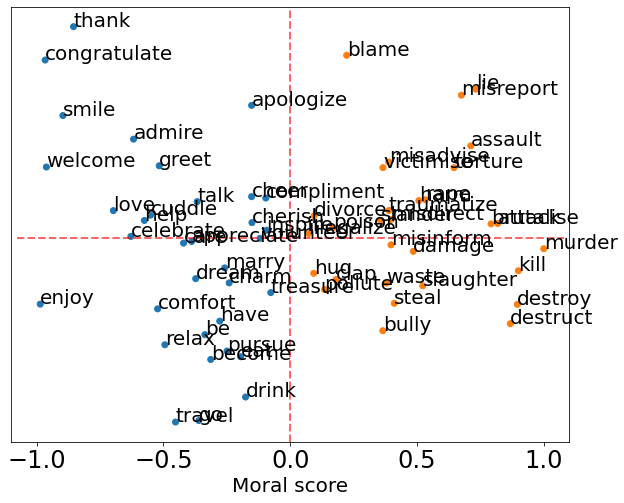

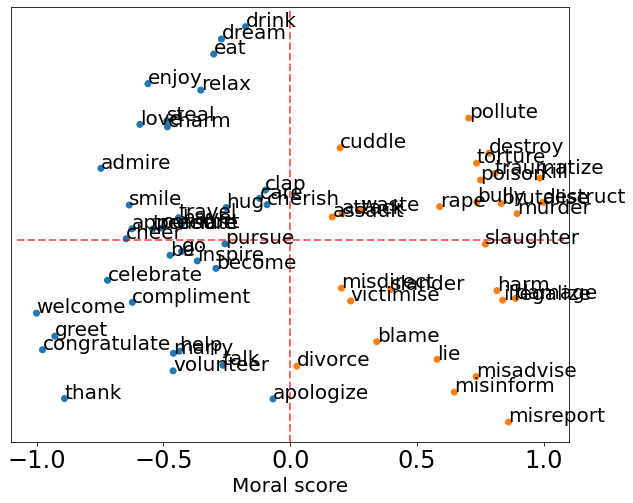

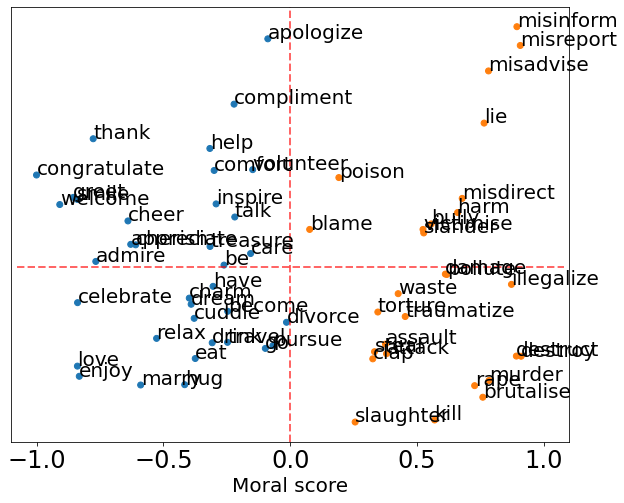

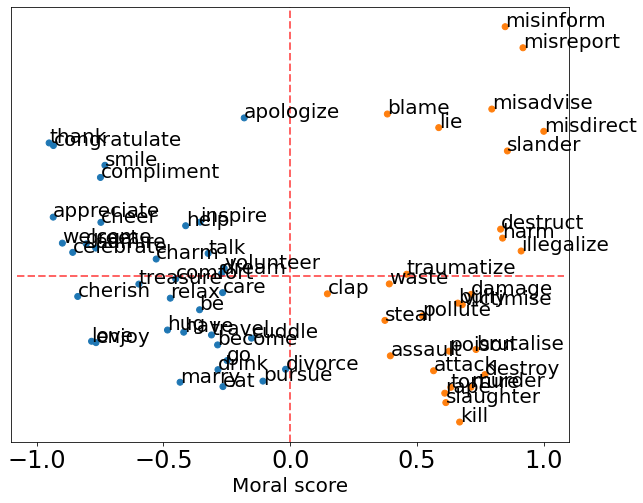

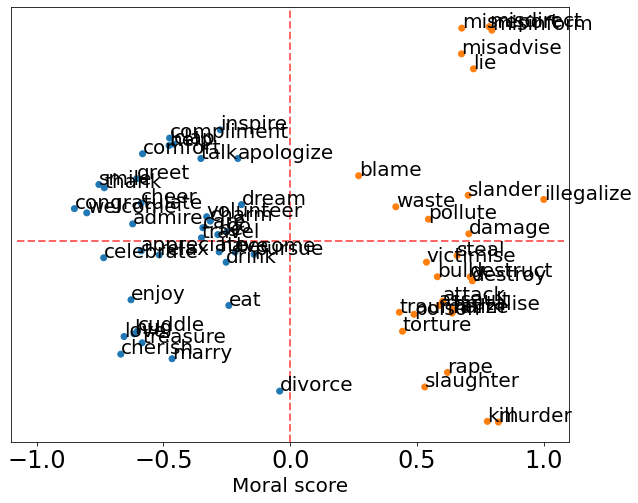

In [247]:
for i, f in enumerate(files):
    print(i, f)
    scale = 1 
    if i in [1,2]:
        scale = -1
    plot_stuf(f, scale)

In [248]:
all_data[0].keys()

dict_keys(['clustered_sentences', 'projection', 'Y', 'mean', 'std', 'actions_colors', 'corpus_embeddings', 'sign'])

In [249]:
all_data[0]['corpus_embeddings']

(array([[-1.1427454e+00, -3.1598454e+00, -8.3795905e-01,  2.2314551e+00,
         -1.0433749e+00],
        [ 2.4055843e+00, -1.7396356e+00,  2.9420885e-01,  5.6899571e-01,
          8.8546222e-01],
        [-6.9430244e-01, -1.1447307e-02,  2.8796580e+00, -3.5518086e+00,
         -1.5358855e+00],
        [ 2.2202361e+00, -1.2014378e+00,  1.0695252e+00,  8.5530502e-01,
         -1.3110467e+00],
        [ 3.7856703e+00,  1.8664858e+00, -2.1998172e+00, -4.9498734e-01,
         -7.9897016e-01],
        [-5.6273109e-01,  1.0584227e+00,  1.6186007e+00, -1.2269800e+00,
         -1.2905832e-01],
        [-1.9706348e+00, -2.5730920e+00,  1.9169868e+00, -2.8385727e+00,
          6.2365681e-01],
        [-1.4565272e+00, -3.0082276e+00,  3.3724937e+00, -1.3678519e+00,
          7.5267643e-01],
        [ 5.5347949e-01,  5.8773375e-01, -3.5025775e+00, -4.5793023e+00,
          1.6570611e+00],
        [-5.2500558e+00,  3.2516947e+00, -1.9429064e+00,  1.9522437e+00,
          1.1287585e+00],
        [-

In [250]:
all_data_values = {}
all_data_values_2 = {}
all_data_values_2_only = {}

for i,ad in enumerate(all_data): 
    for j,w in enumerate(ad['corpus_embeddings'][1]):
        if w not in all_data_values:
            all_data_values[w] = []
            all_data_values_2[w]= []
            all_data_values_2_only[w]= []
        scale = 1
        if i in [1,2]:
            scale = -1
        all_data_values[w].append(scale*ad['corpus_embeddings'][0][j,0] )
        all_data_values_2[w].append([scale*ad['corpus_embeddings'][0][j,0], ad['corpus_embeddings'][0][j,1]])
        all_data_values_2_only[w].append(ad['corpus_embeddings'][0][j,1] )



In [251]:
all_data_values

{'eat': [-1.1427453756332397,
  -1.8202123641967773,
  -2.6014397144317627,
  -1.8741232226920501,
  -1.7053070068359375],
 'steal': [2.4055843353271484,
  -2.935551643371582,
  2.3125531673431396,
  2.642171216925325,
  4.642488479614258],
 'volunteer': [-0.6943024396896362,
  -2.788137435913086,
  -1.0270813703536987,
  -1.8390818122577672,
  -2.320352554321289],
 'waste': [2.22023606300354,
  1.675986647605896,
  2.960984230041504,
  2.7644544716186656,
  2.9391512870788574],
 'torture': [3.785670280456543,
  4.442908763885498,
  2.4036099910736084,
  4.4802812736697355,
  3.1258437633514404],
 'compliment': [-0.5627310872077942,
  -3.7595202922821045,
  -1.5373164415359497,
  -5.2895256913662765,
  -3.3518598079681396],
 'be': [-1.9706348180770874,
  -2.8611299991607666,
  -1.8132243156433105,
  -2.525066343688836,
  -2.010965347290039],
 'pursue': [-1.4565272331237793,
  -1.5514566898345947,
  -0.47266310453414917,
  -0.758481561633724,
  -1.0044718980789185],
 'divorce': [0.55347

In [252]:
import pandas as pd

In [253]:
pdall = pd.DataFrame(all_data_values)

In [254]:
pdall

,eat,steal,volunteer,waste,torture,compliment,be,pursue,divorce,smile,...,illegalize,slander,misadvise,thank,slaughter,appreciate,charm,kill,celebrate,comfort
0,-1.142745,2.405584,-0.694302,2.220236,3.785670,-0.562731,-1.970635,-1.456527,0.553479,-5.250056,...,0.422732,2.088772,2.275951,-5.004029,3.063782,-2.274839,-1.409160,5.271422,-3.679350,-3.062099
1,-1.820212,-2.935552,-2.788137,1.675987,4.442909,-3.759520,-2.861130,-1.551457,0.159184,-3.831329,...,5.062761,2.400159,4.431084,-5.375293,4.648630,-3.766096,-2.923937,5.946791,-4.349482,-3.062454
2,-2.601440,2.312553,-1.027081,2.960984,2.403610,-1.537316,-1.813224,-0.472663,-0.100263,-5.833195,...,6.066435,3.661699,5.437363,-5.398574,1.781864,-4.370143,-2.764913,3.960287,-5.827418,-2.083179
3,-1.874123,2.642171,-1.839082,2.764454,4.480281,-5.289526,-2.525066,-0.758482,-0.127974,-5.164512,...,6.440856,6.057050,5.622718,-6.720247,4.340644,-6.606509,-3.735446,4.725442,-6.062649,-3.191922
4,-1.705307,4.642488,-2.320353,2.939151,3.125844,-3.351860,-2.010965,-1.004472,-0.291309,-5.319994,...,7.055007,4.952838,4.766115,-5.168456,3.745077,-4.141893,-2.221138,5.484577,-5.186122,-4.105516


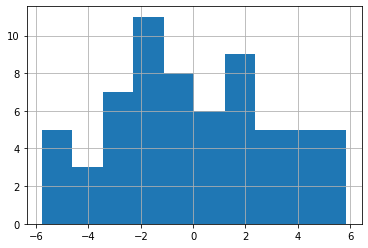

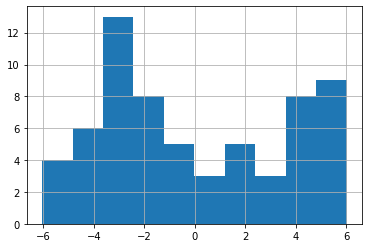

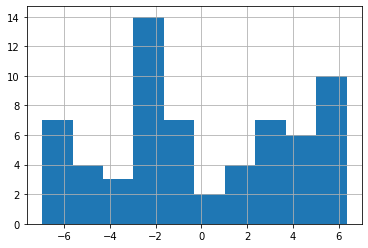

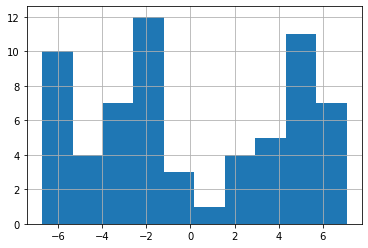

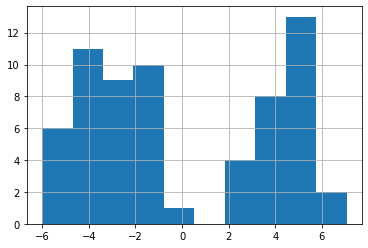

In [255]:
for i in range(5):
    plt.figure()
    pdall.iloc[i].hist()

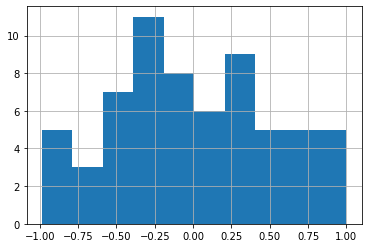

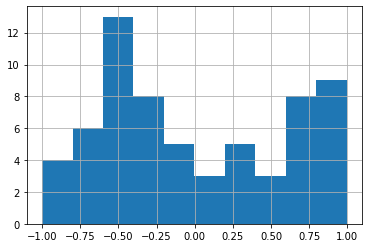

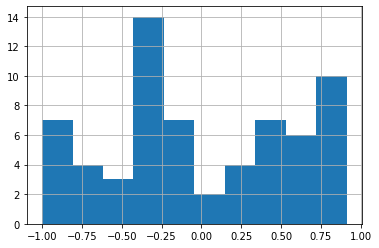

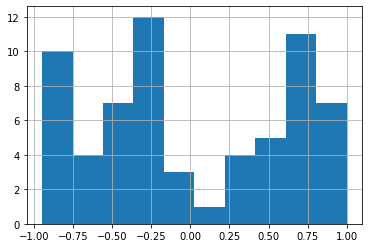

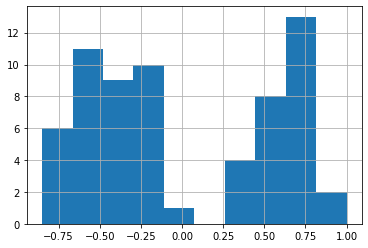

In [256]:
for i in range(5):
    plt.figure()
    (pdall.iloc[i]/pdall.iloc[i].abs().max()).hist()

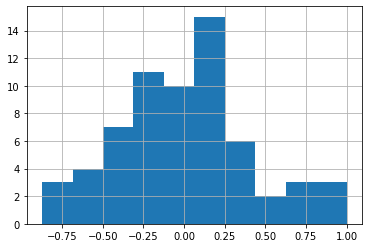

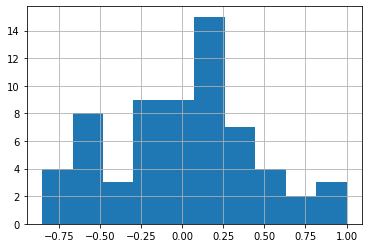

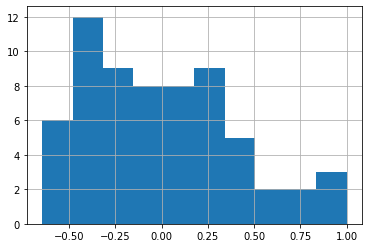

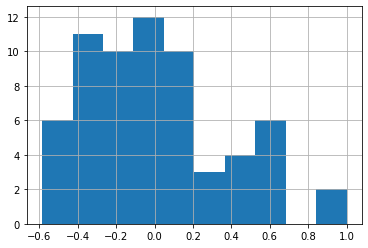

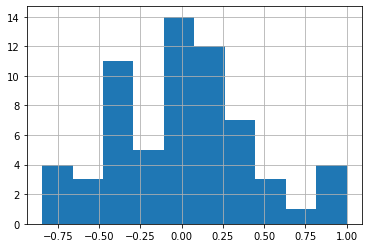

In [257]:
pdall_2 = pd.DataFrame(all_data_values_2_only)
for i in range(5):
    plt.figure()
    (pdall_2.iloc[i]/pdall_2.iloc[i].abs().max()).hist()

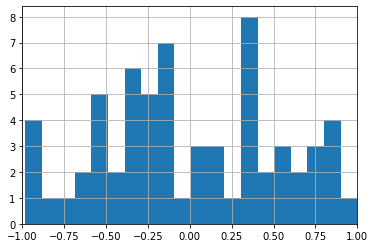

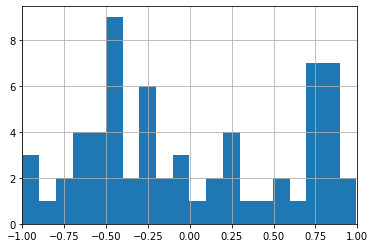

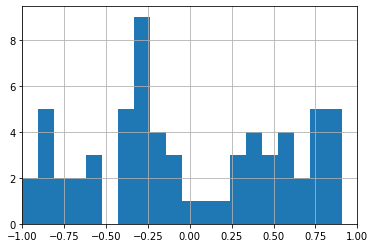

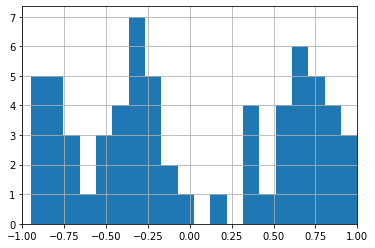

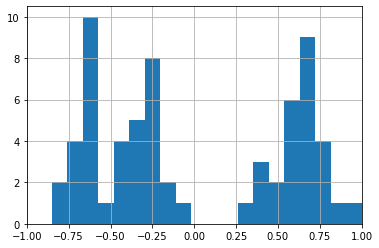

In [258]:
for i in range(5):
    plt.figure()
    (pdall.iloc[i]/pdall.iloc[i].abs().max()).hist(bins=20)
    plt.xlim(-1,1)

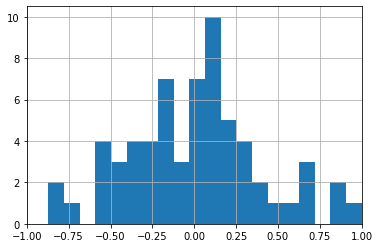

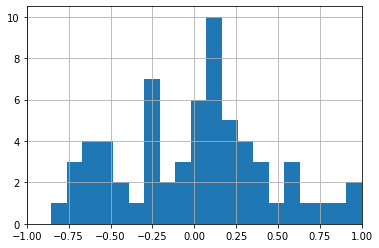

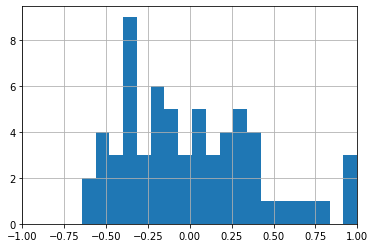

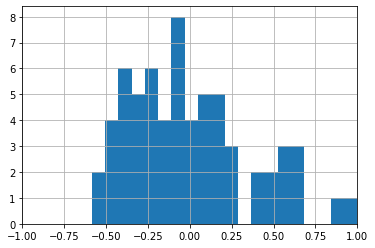

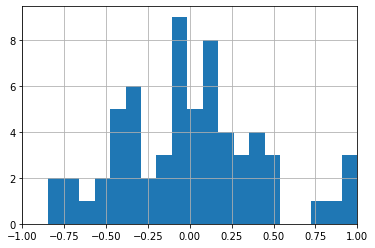

In [259]:
pdall_2 = pd.DataFrame(all_data_values_2_only)
for i in range(5):
    plt.figure()
    (pdall_2.iloc[i]/pdall_2.iloc[i].abs().max()).hist(bins=20)
    plt.xlim(-1,1)

In [260]:
pdall.columns

Index(['eat', 'steal', 'volunteer', 'waste', 'torture', 'compliment', 'be',
       'pursue', 'divorce', 'smile', 'dream', 'love', 'destroy', 'lie',
       'inspire', 'help', 'hug', 'clap', 'blame', 'treasure', 'become',
       'pollute', 'go', 'cuddle', 'drink', 'destruct', 'cherish', 'have',
       'cheer', 'harm', 'misdirect', 'attack', 'care', 'brutalise', 'welcome',
       'relax', 'bully', 'apologize', 'murder', 'misreport', 'marry',
       'assault', 'misinform', 'admire', 'traumatize', 'damage',
       'congratulate', 'victimise', 'enjoy', 'travel', 'talk', 'rape',
       'poison', 'greet', 'illegalize', 'slander', 'misadvise', 'thank',
       'slaughter', 'appreciate', 'charm', 'kill', 'celebrate', 'comfort'],
      dtype='object')

(array([34., 11.,  5.,  6.,  2.,  2.,  0.,  2.,  1.,  1.]),
 array([0.03186517, 0.82475318, 1.6176412 , 2.41052921, 3.20341722,
        3.99630524, 4.78919325, 5.58208127, 6.37496928, 7.16785729,
        7.96074531]),
 <a list of 10 Patch objects>)

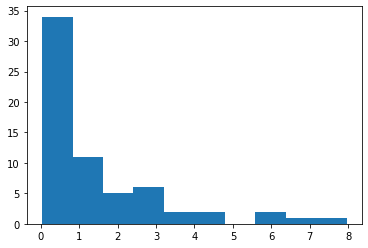

In [261]:
plt.hist([pdall[k].var() for k in pdall.columns])

In [262]:
keys = [k for k,v in [(k, pdall[k].var()) for k in pdall.columns] if v < 1]
keys_high = [k for k,v in [(k, pdall[k].var()) for k in pdall.columns] if v > 5]

In [263]:
all_data_values_2

{'eat': [[-1.1427453756332397, -3.1598454],
  [-1.8202123641967773, 4.9059434],
  [-2.6014397144317627, -2.6298828],
  [-1.8741232226920501, -3.3083990591605645],
  [-1.7053070068359375, -1.8824207]],
 'steal': [[2.4055843353271484, -1.7396356],
  [-2.935551643371582, 3.1486955],
  [2.3125531673431396, -2.4347184],
  [2.642171216925325, -1.3283803666273946],
  [4.642488479614258, -0.42490745]],
 'volunteer': [[-0.6943024396896362, -0.011447307],
  [-2.788137435913086, -3.4533713],
  [-1.0270813703536987, 2.7976148],
  [-1.8390818122577672, 0.2306832846526103],
  [-2.320352554321289, 0.7071892]],
 'waste': [[2.22023606300354, -1.2014378],
  [1.675986647605896, 0.7699705],
  [2.960984230041504, -0.76657236],
  [2.7644544716186656, -0.2374636328813496],
  [2.9391512870788574, 0.99537057]],
 'torture': [[3.785670280456543, 1.8664858],
  [4.442908763885498, 2.0272877],
  [2.4036099910736084, -1.294298],
  [4.4802812736697355, -3.330117144521346],
  [3.1258437633514404, -2.6345053]],
 'compl

In [264]:
all_array= []
for k in keys:
    all_array.extend(all_data_values_2[k])
npaa = np.array(all_array)

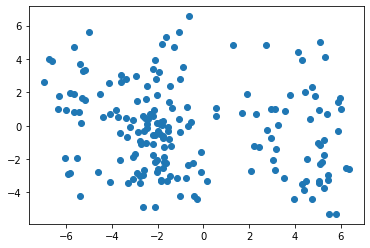

In [265]:
plt.scatter(npaa[:,0],npaa[:,1])

/tmp/ipykernel_3410803/1690476695.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


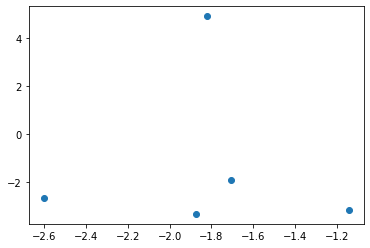

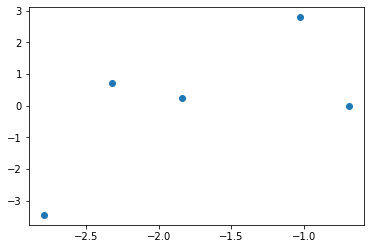

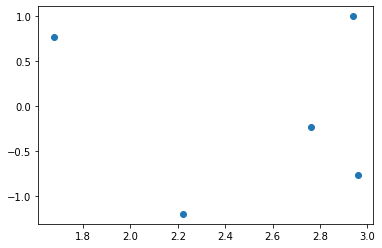

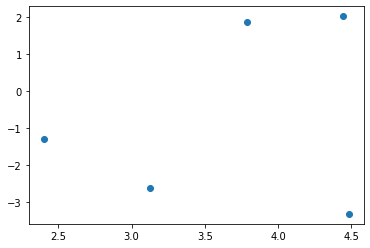

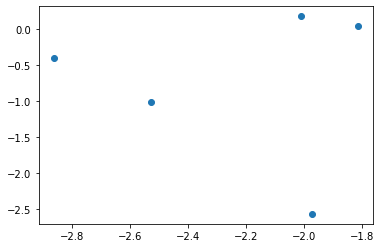

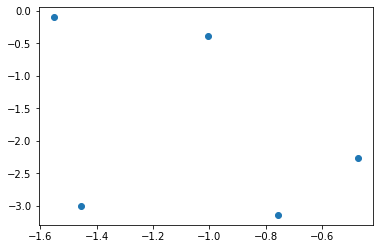

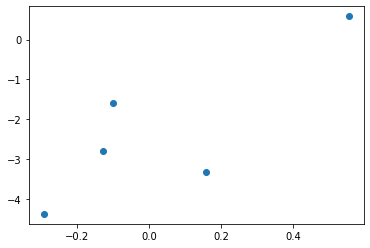

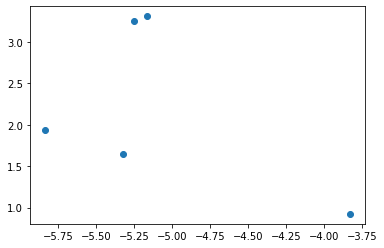

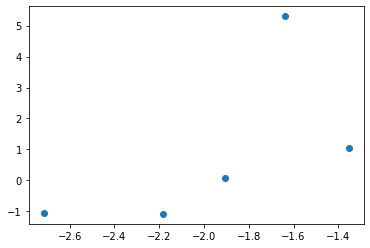

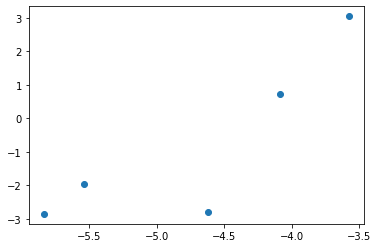

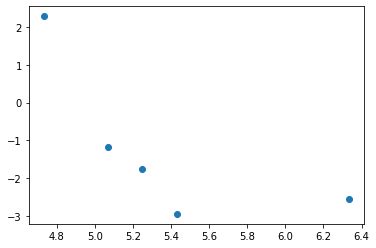

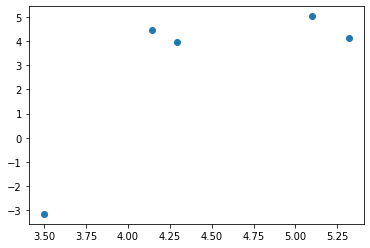

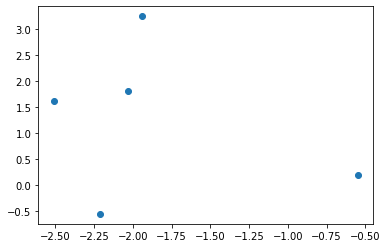

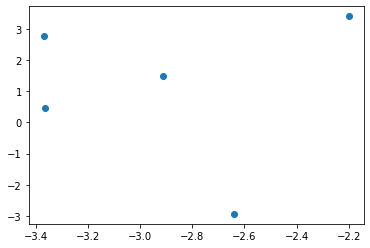

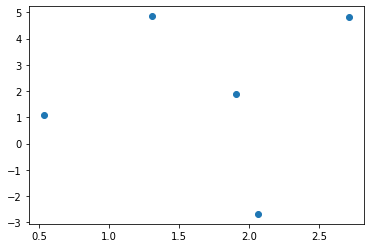

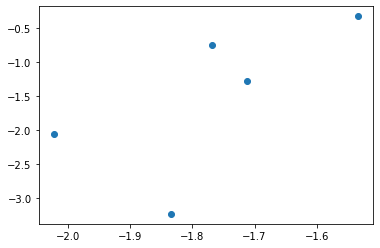

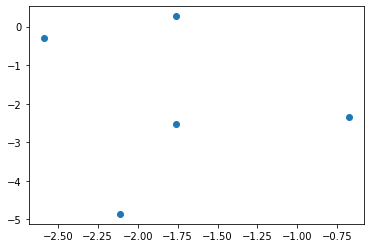

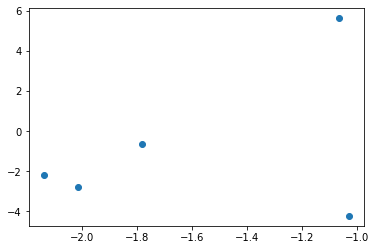

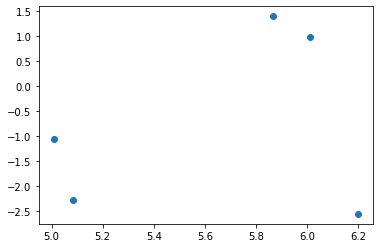

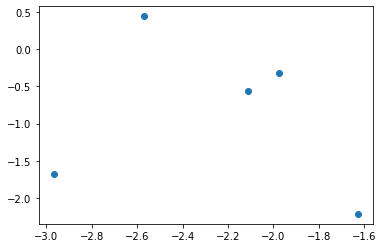

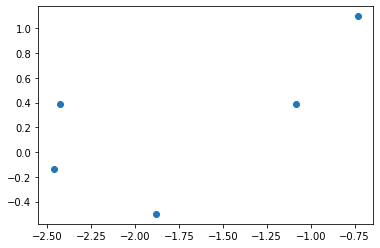

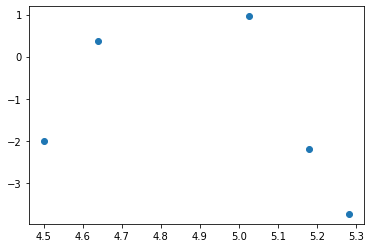

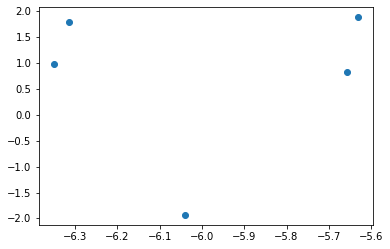

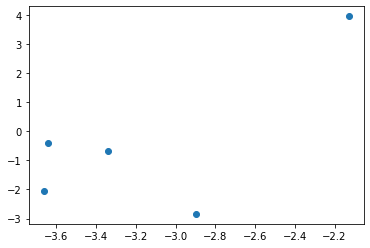

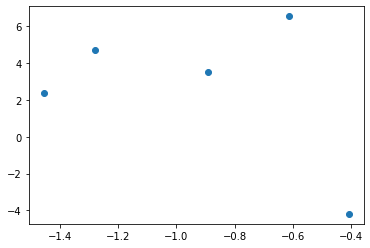

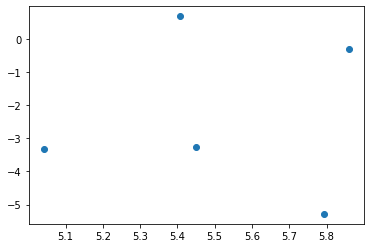

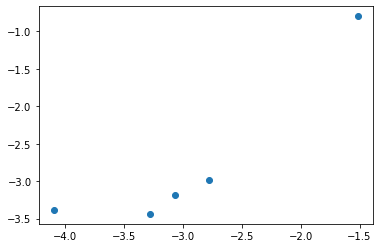

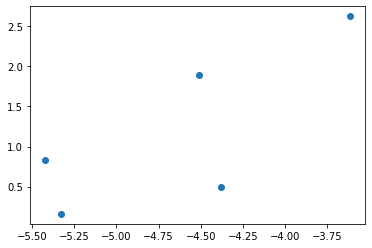

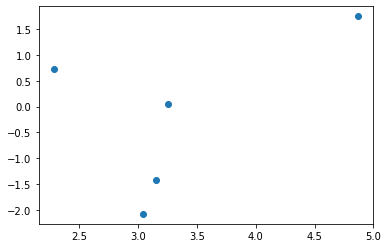

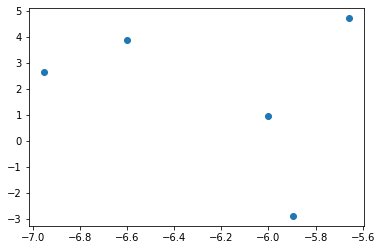

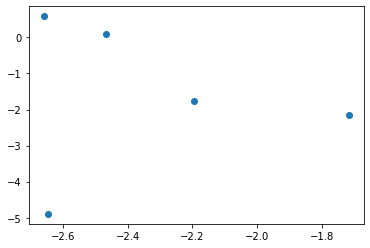

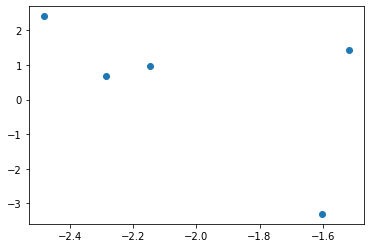

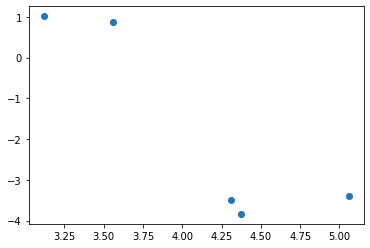

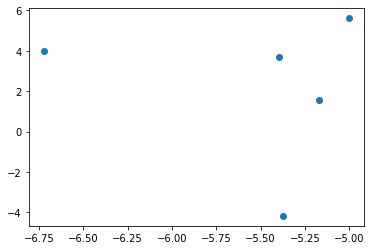

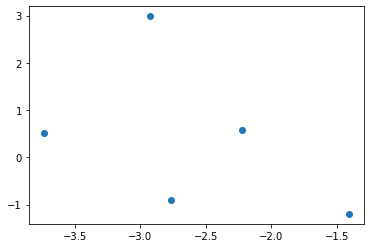

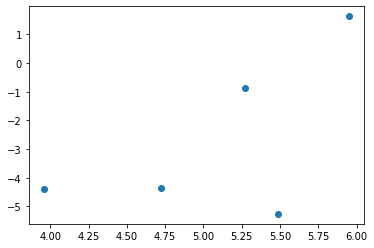

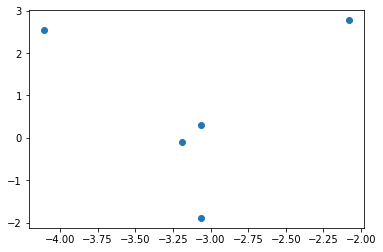

In [266]:
for k in keys:
    npa = np.array(all_data_values_2[k])
    plt.figure()
    plt.scatter(npa[:,0],npa[:,1])

In [267]:
pd_1_only = pd.DataFrame(all_data_values)

In [268]:
pd_2_only = pd.DataFrame(all_data_values_2_only)

In [269]:
for i in range(5):
    ci = pd_2_only.iloc[i]
    ci /= ci.abs().max()
    ci = pd_1_only.iloc[i]
    ci /= ci.abs().max()

/tmp/ipykernel_3410803/611264188.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


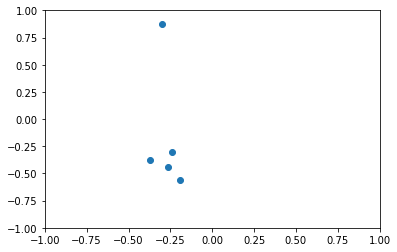

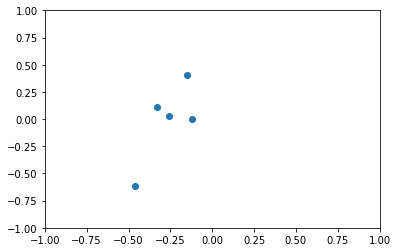

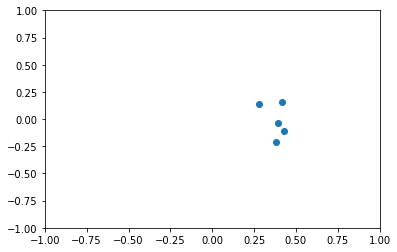

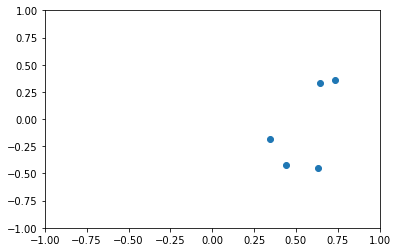

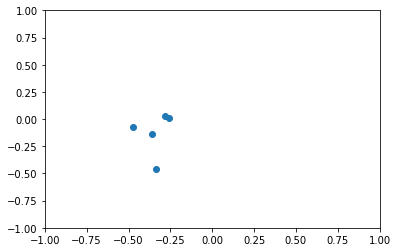

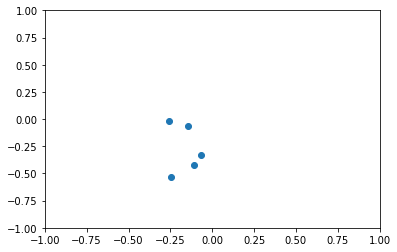

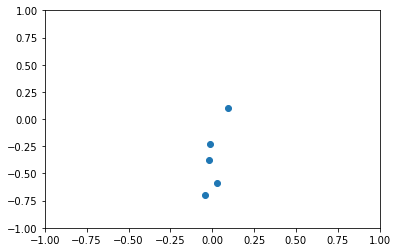

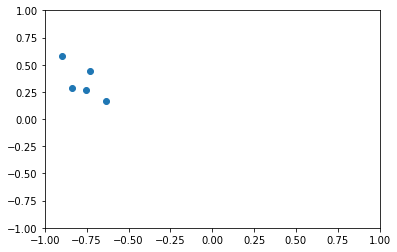

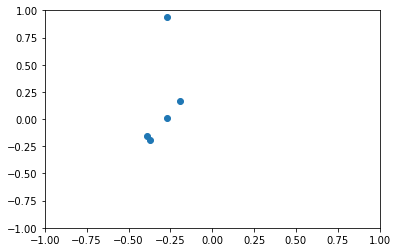

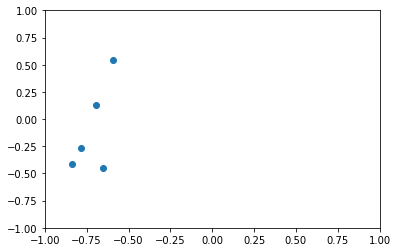

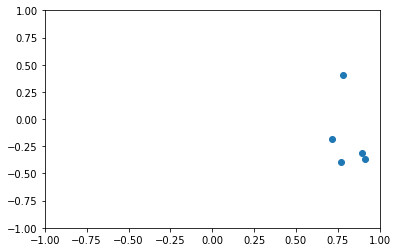

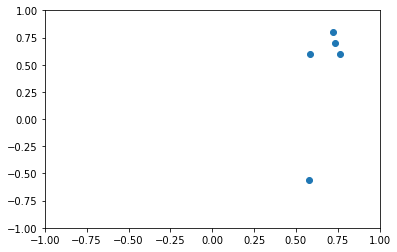

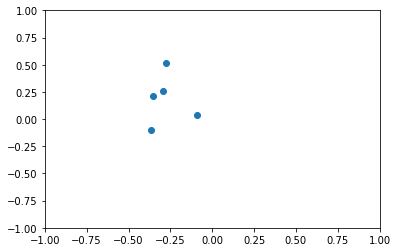

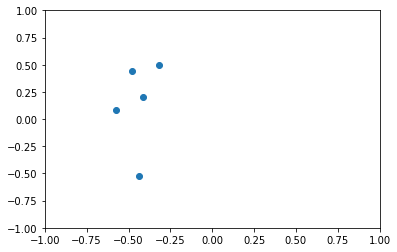

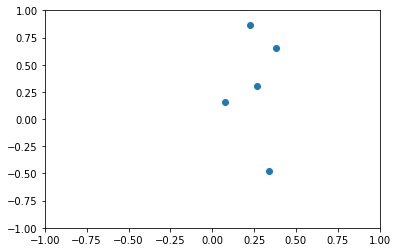

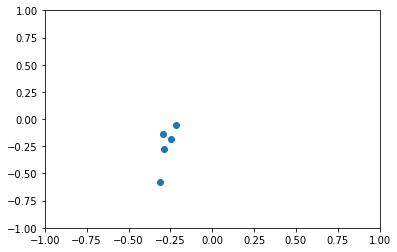

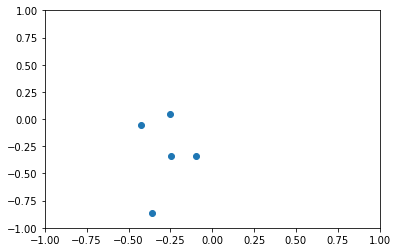

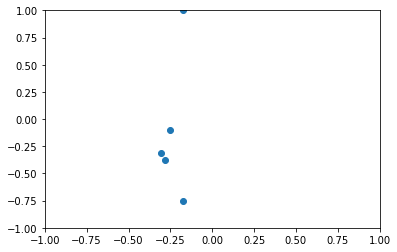

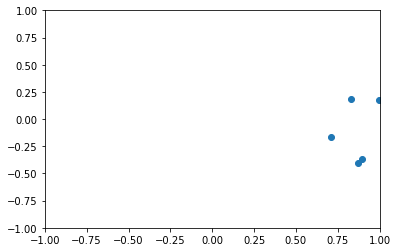

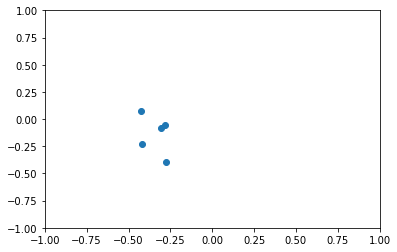

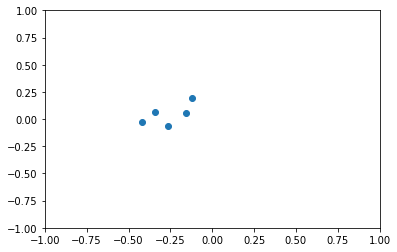

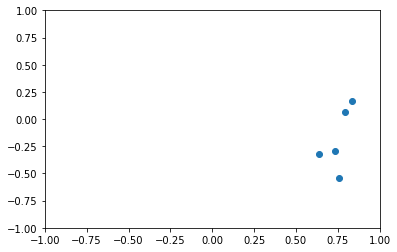

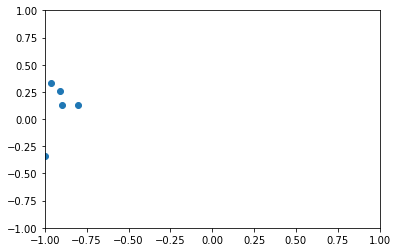

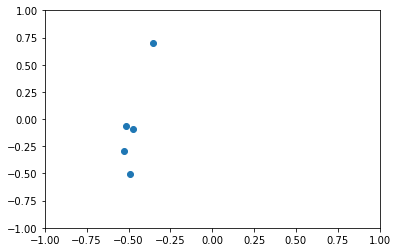

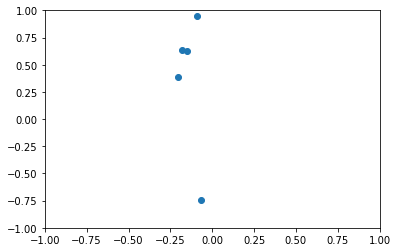

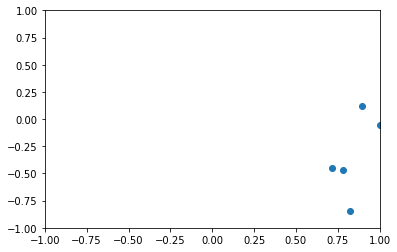

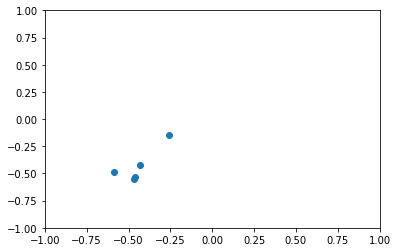

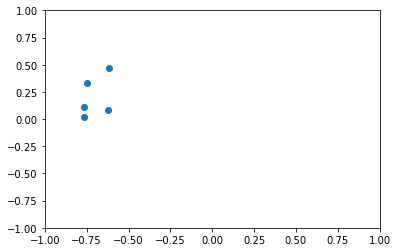

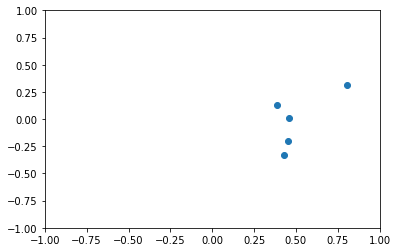

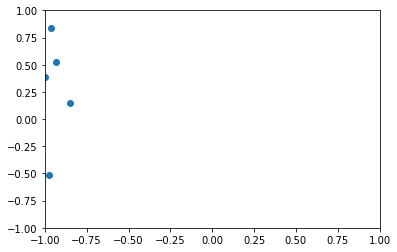

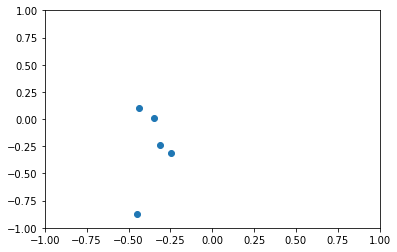

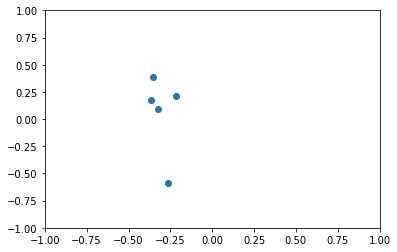

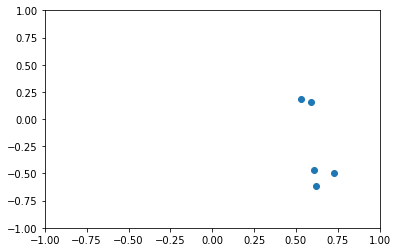

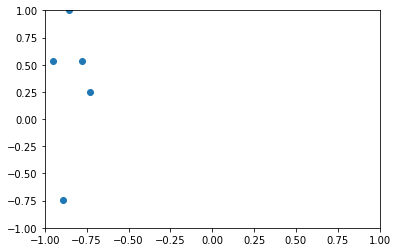

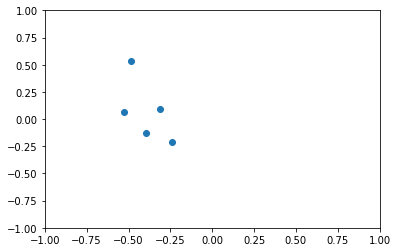

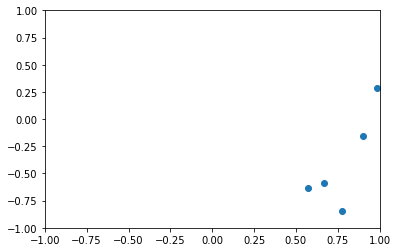

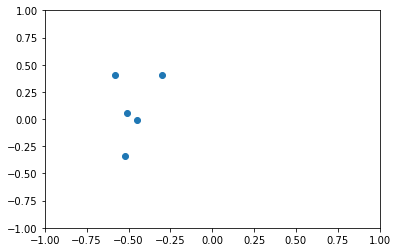

In [270]:
for k in keys:
    plt.figure()
    plt.scatter(pd_1_only[k],pd_2_only[k])
    plt.ylim(-1,1)
    plt.xlim(-1,1)


['steal', 'cherish', 'misdirect', 'illegalize']


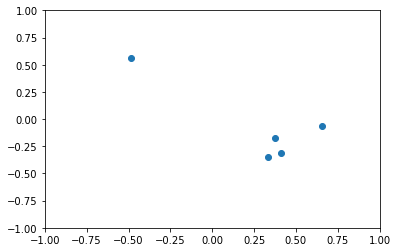

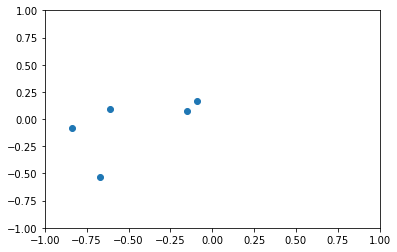

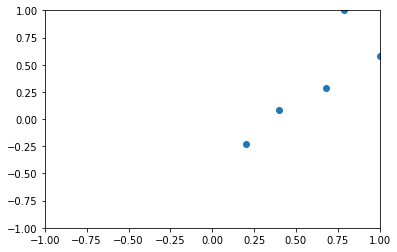

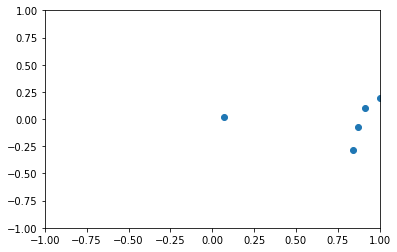

In [271]:
print(keys_high)
for k in keys_high:
    plt.figure()
    plt.scatter(pd_1_only[k],pd_2_only[k])
    plt.ylim(-1,1)
    plt.xlim(-1,1)


In [272]:
allnp =np.stack([pd_1_only.transpose().to_numpy(), pd_2_only.transpose().to_numpy()])
allnp = allnp.swapaxes(0,-1).swapaxes(0,1)

In [273]:
allnp.shape

(64, 5, 2)

In [274]:
varnp = allnp.var(axis=1)

(array([15., 18., 14.,  6.,  4.,  1.,  4.,  0.,  0.,  2.]),
 array([0.01764838, 0.06863526, 0.11962214, 0.17060901, 0.22159589,
        0.27258277, 0.32356964, 0.37455652, 0.4255434 , 0.47653027,
        0.52751715]),
 <a list of 10 Patch objects>)

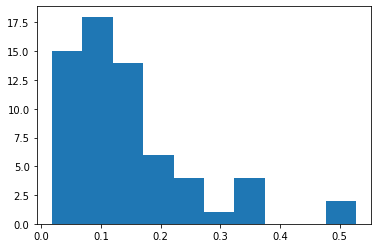

In [275]:
plt.hist(varnp.sum(axis=1))

In [276]:
varnp.sum(axis=1)

array([0.27879613, 0.26019677, 0.12628824, 0.02330808, 0.14588351,
       0.16842213, 0.03660293, 0.0464017 , 0.08285587, 0.02981166,
       0.17704447, 0.14931902, 0.09475814, 0.25601547, 0.05366896,
       0.13957352, 0.11124366, 0.16559916, 0.22448322, 0.08529155,
       0.03396421, 0.12065801, 0.1126945 , 0.17758263, 0.35484463,
       0.07450528, 0.15009962, 0.03067117, 0.04899146, 0.06991357,
       0.2557532 , 0.09043064, 0.02066067, 0.07377182, 0.06036292,
       0.17144942, 0.06966996, 0.34599485, 0.12605135, 0.50238092,
       0.0335342 , 0.12855622, 0.52751715, 0.03350791, 0.07599183,
       0.02820569, 0.20948534, 0.07105   , 0.20703656, 0.1232541 ,
       0.11491758, 0.12215315, 0.13928252, 0.11072029, 0.14047597,
       0.0908678 , 0.33276596, 0.34392534, 0.09270615, 0.04044394,
       0.07768911, 0.18681556, 0.01764838, 0.08716482])

In [277]:
[i for i,v in enumerate(varnp.sum(axis=1)) if v < .025]

[3, 32, 62]

In [278]:
pd_1_only.columns

Index(['eat', 'steal', 'volunteer', 'waste', 'torture', 'compliment', 'be',
       'pursue', 'divorce', 'smile', 'dream', 'love', 'destroy', 'lie',
       'inspire', 'help', 'hug', 'clap', 'blame', 'treasure', 'become',
       'pollute', 'go', 'cuddle', 'drink', 'destruct', 'cherish', 'have',
       'cheer', 'harm', 'misdirect', 'attack', 'care', 'brutalise', 'welcome',
       'relax', 'bully', 'apologize', 'murder', 'misreport', 'marry',
       'assault', 'misinform', 'admire', 'traumatize', 'damage',
       'congratulate', 'victimise', 'enjoy', 'travel', 'talk', 'rape',
       'poison', 'greet', 'illegalize', 'slander', 'misadvise', 'thank',
       'slaughter', 'appreciate', 'charm', 'kill', 'celebrate', 'comfort'],
      dtype='object')

waste
smile
care
damage
celebrate


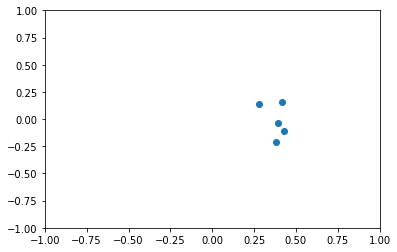

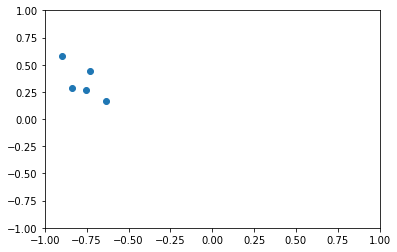

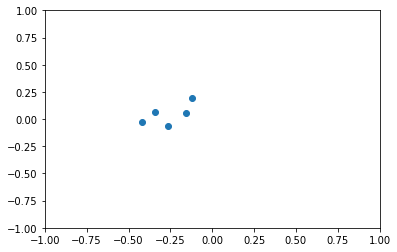

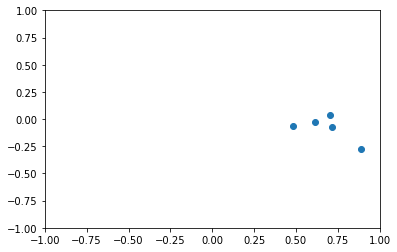

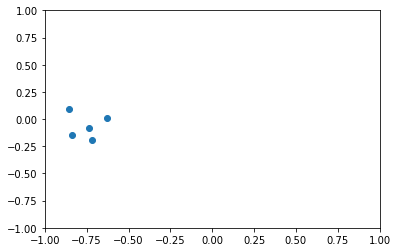

In [279]:
for i, k in enumerate(pd_1_only.columns):
    if i in [i for i,v in enumerate(varnp.sum(axis=1)) if v < .03]:
        print(k)
        plt.figure()
        plt.scatter(pd_1_only[k],pd_2_only[k])
        plt.ylim(-1,1)
        plt.xlim(-1,1)

eat
steal
volunteer
torture
compliment
divorce
dream
love
destroy
lie
help
hug
clap
blame
treasure
pollute
go
cuddle
drink
cherish
misdirect
attack
relax
apologize
murder
misreport
assault
misinform


/tmp/ipykernel_3410803/2137244011.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


congratulate
enjoy
travel
talk
rape
poison
greet
illegalize
slander
misadvise
thank
slaughter
kill
comfort


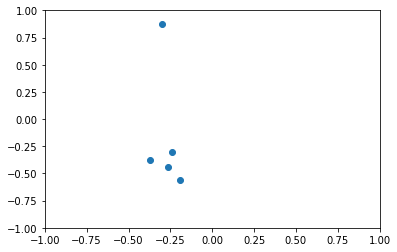

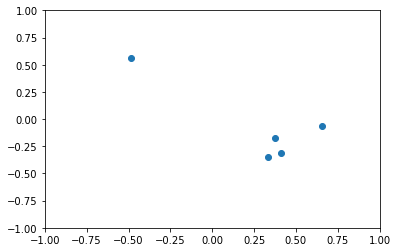

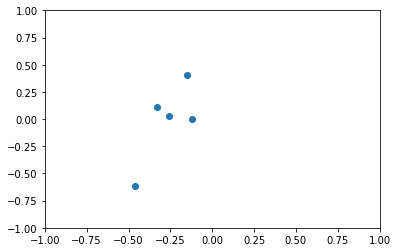

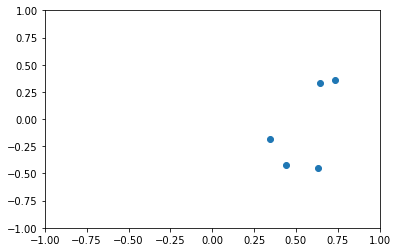

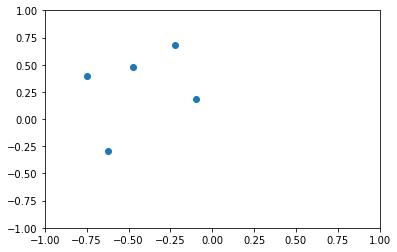

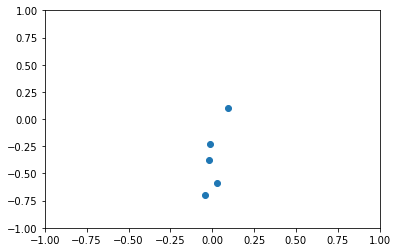

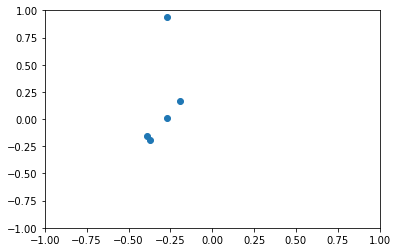

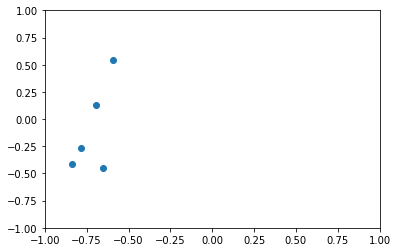

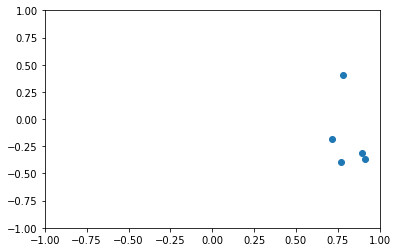

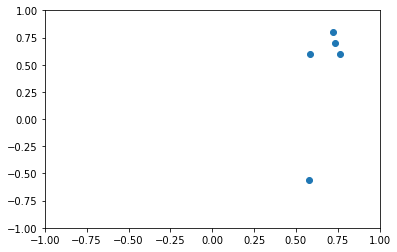

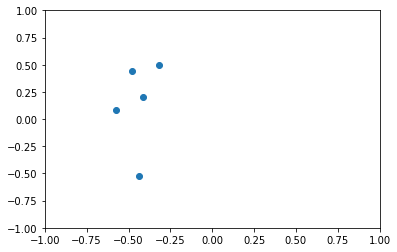

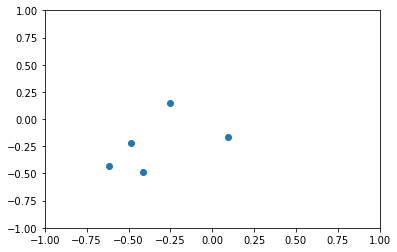

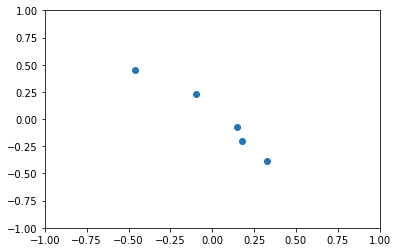

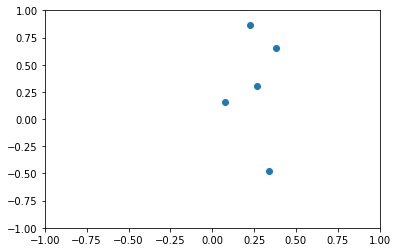

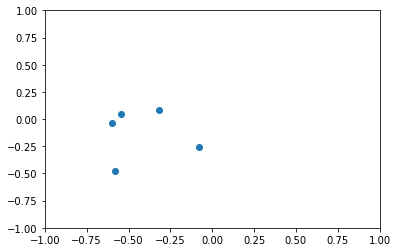

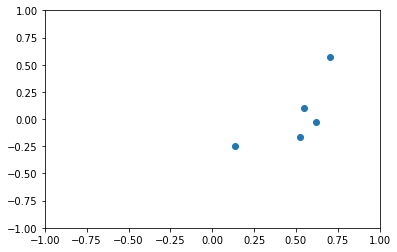

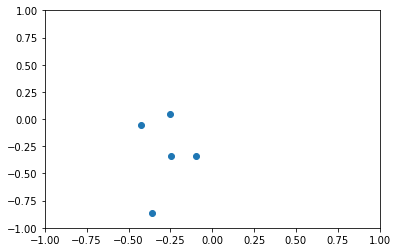

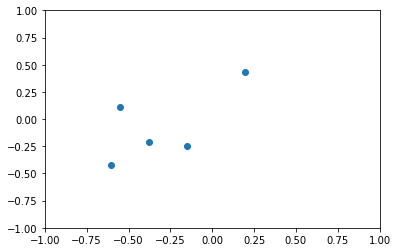

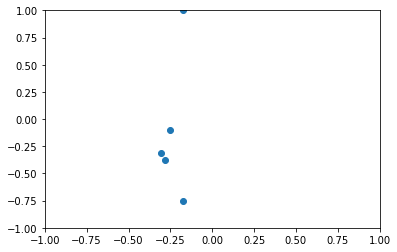

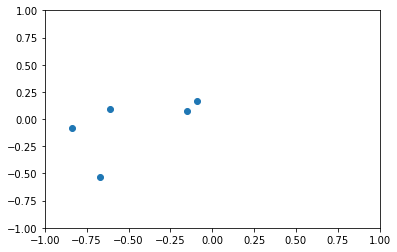

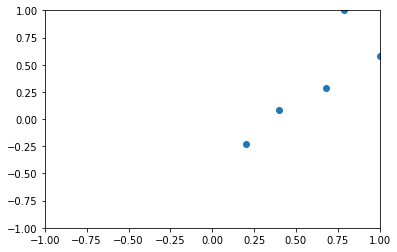

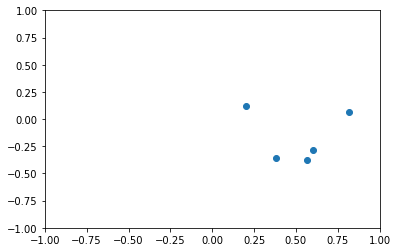

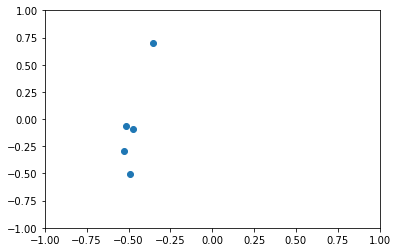

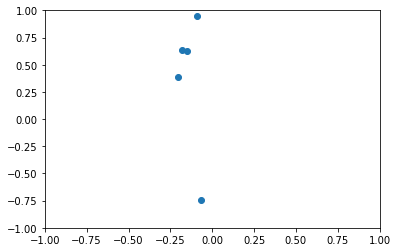

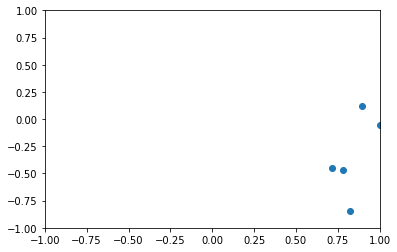

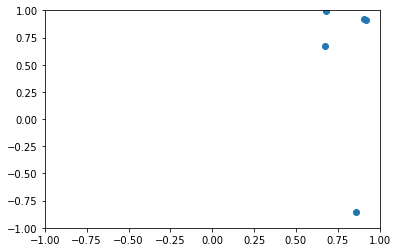

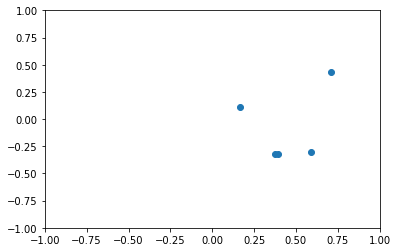

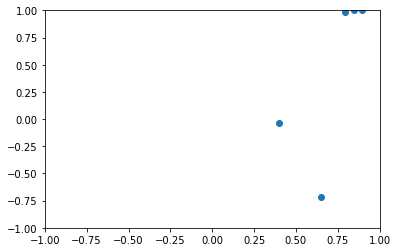

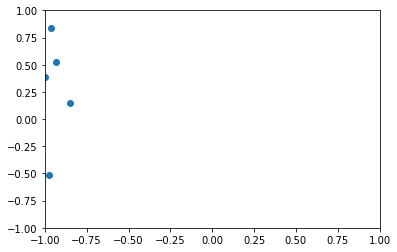

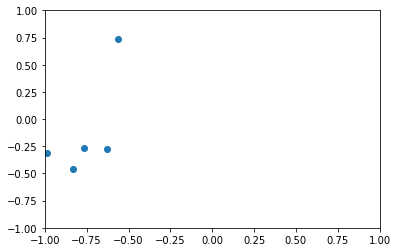

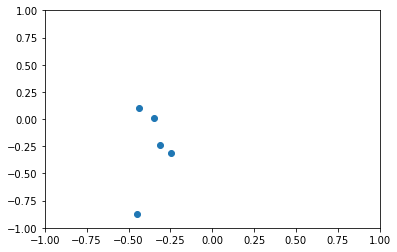

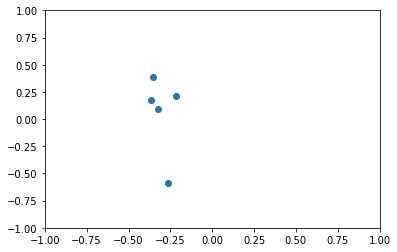

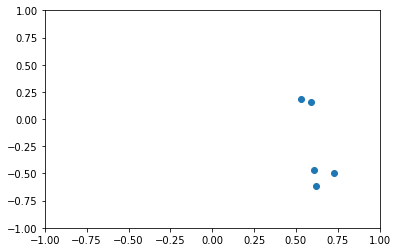

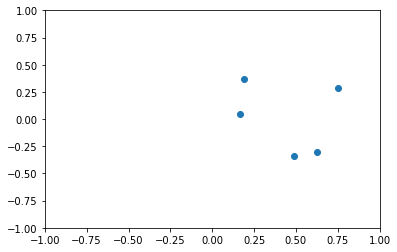

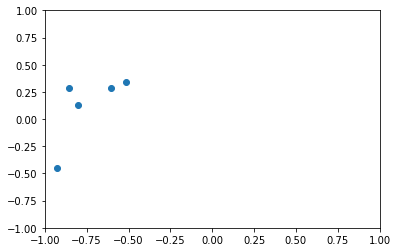

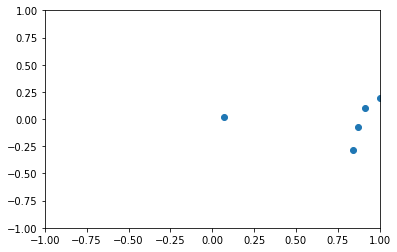

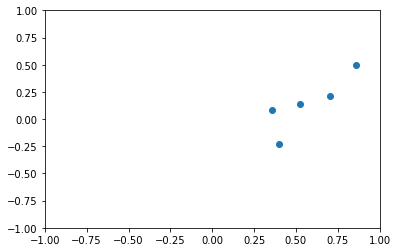

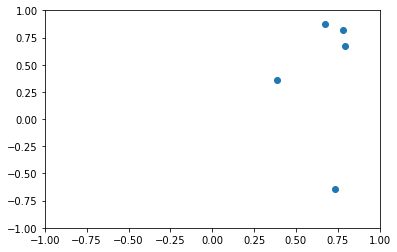

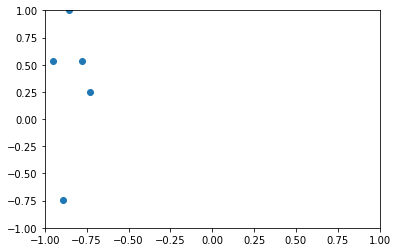

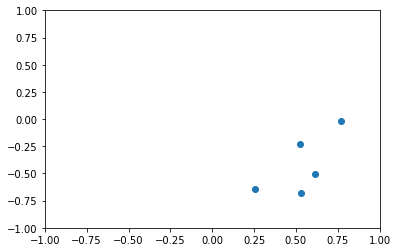

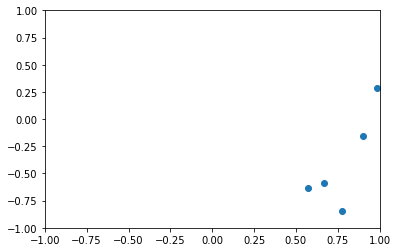

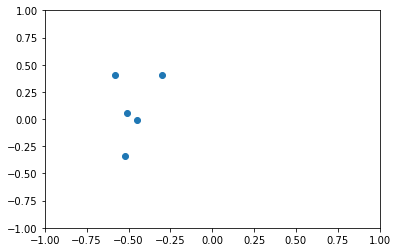

In [280]:
for i, k in enumerate(pd_1_only.columns):
    if i in [i for i,v in enumerate(varnp.sum(axis=1)) if v > .08]:
        print(k)
        plt.figure()
        plt.scatter(pd_1_only[k],pd_2_only[k])
        plt.ylim(-1,1)
        plt.xlim(-1,1)

In [281]:
varnp.shape

(64, 2)

In [282]:
pd_1_only['kill'].mean()

0.7798540214476685

In [283]:
pd_1_only['kill'].tolist()

[0.8997032396554637,
 0.9843544524520095,
 0.5696155529636754,
 0.6681947186256211,
 0.7774021435415728]

/tmp/ipykernel_3410803/1663197777.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


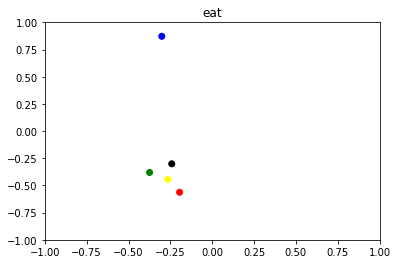

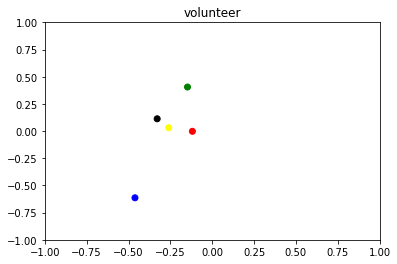

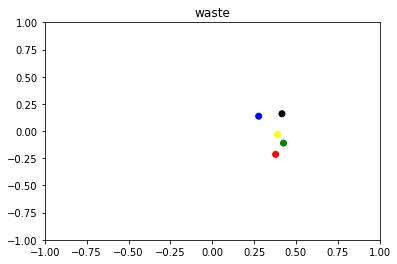

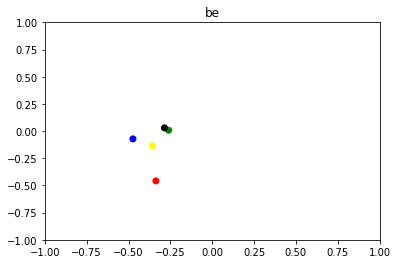

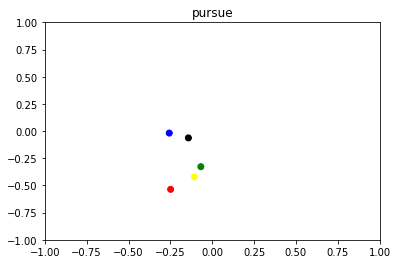

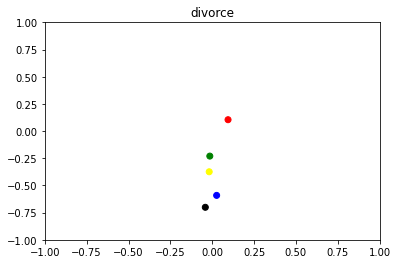

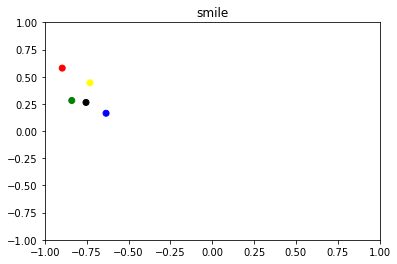

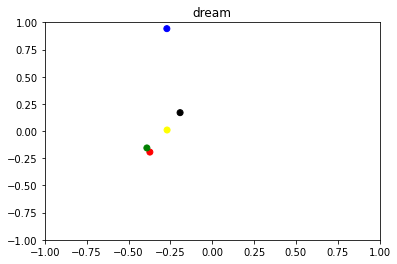

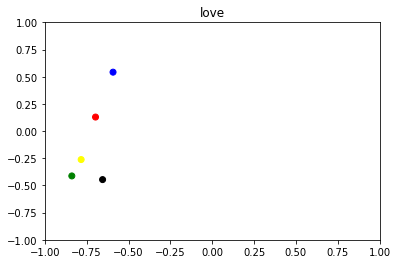

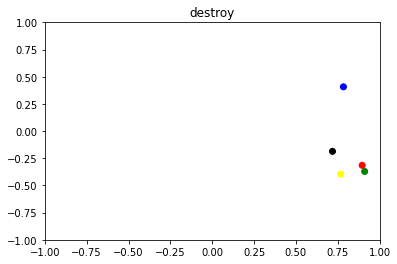

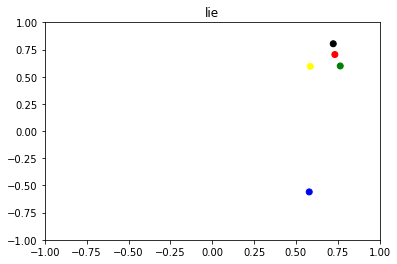

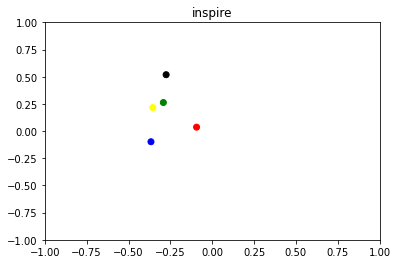

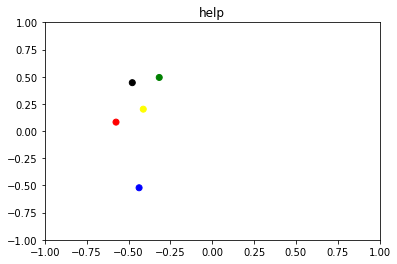

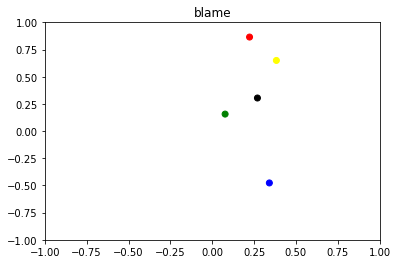

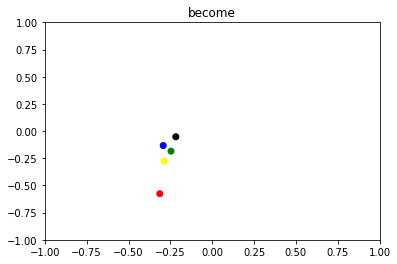

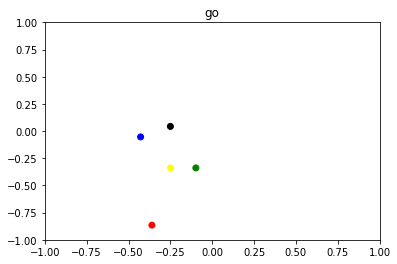

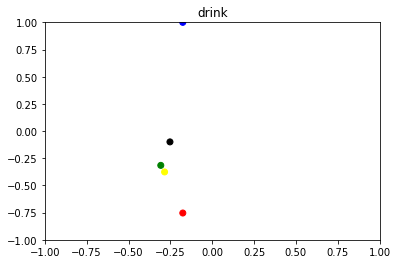

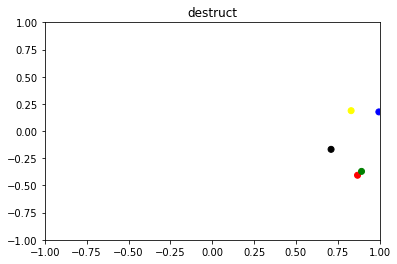

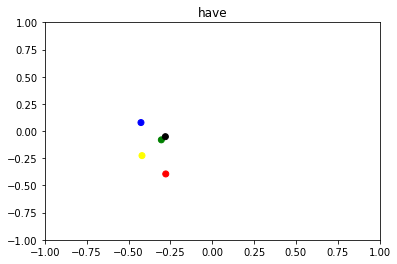

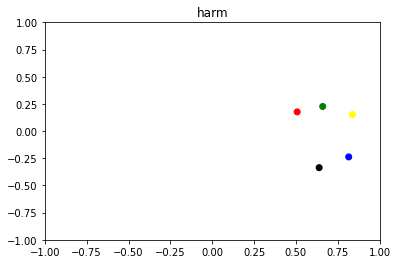

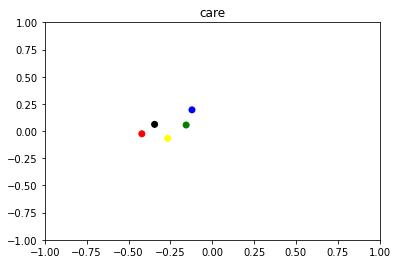

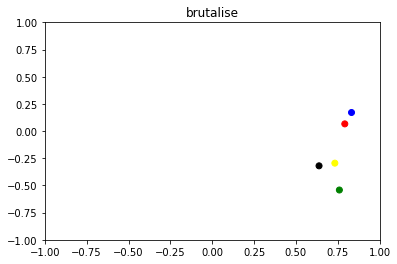

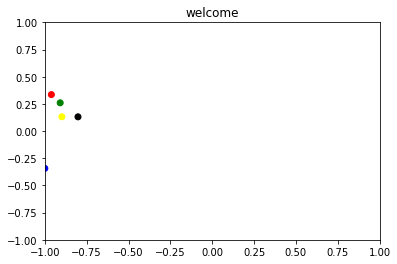

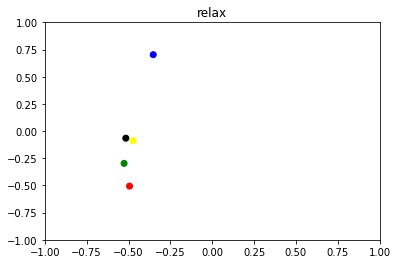

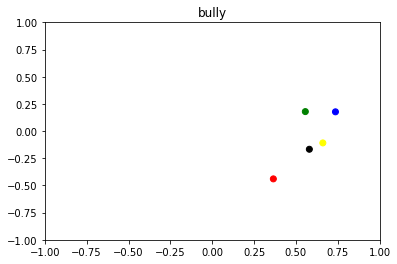

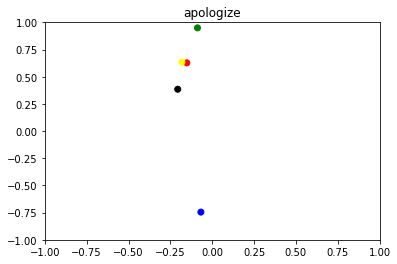

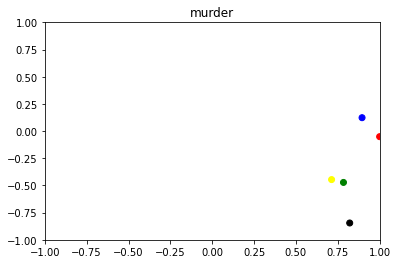

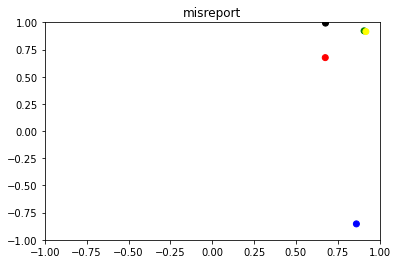

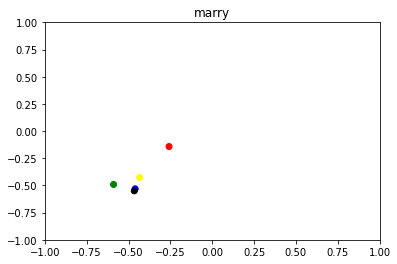

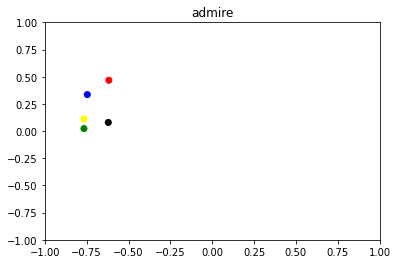

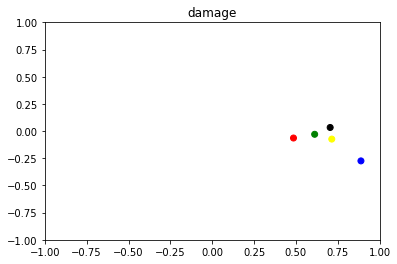

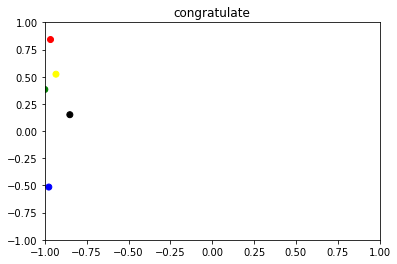

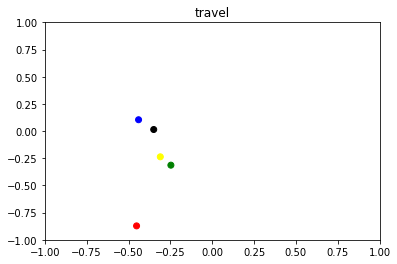

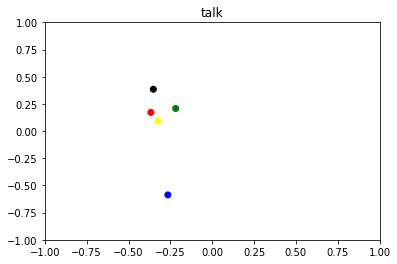

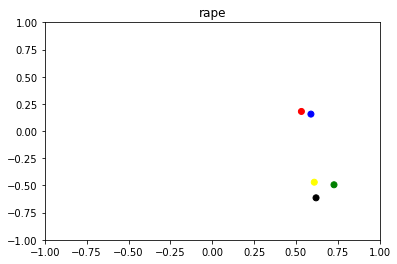

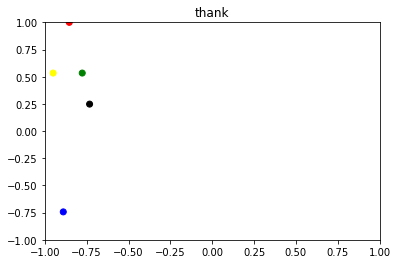

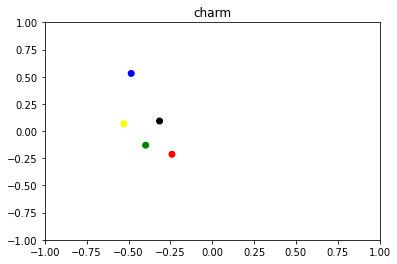

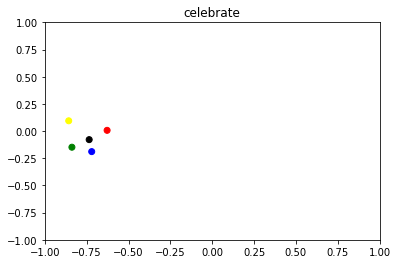

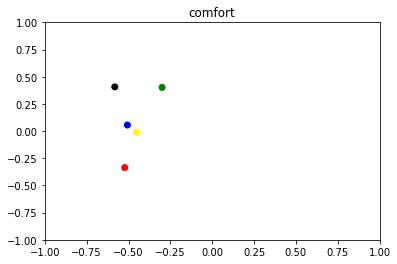

In [284]:
colors = ['red','blue','green','yellow','black']
for i, k in enumerate(pd_1_only.columns):
    if i in [i for i,v in enumerate(varnp[:,0]) if v < .02]:
        plt.figure()
        plt.title(k)
        plt.scatter(pd_1_only[k],pd_2_only[k],c=colors)
        plt.ylim(-1,1)
        plt.xlim(-1,1)

In [285]:
pd_1_only["slaughter"]

0    0.522913
1    0.769474
2    0.256289
3    0.613783
4    0.530840
Name: slaughter, dtype: float64

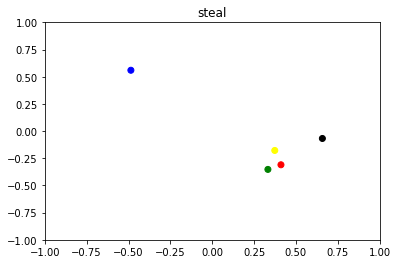

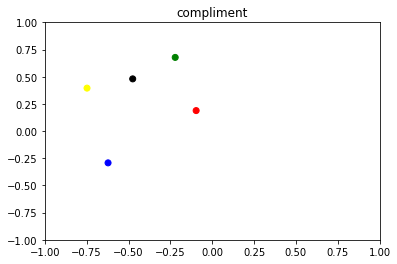

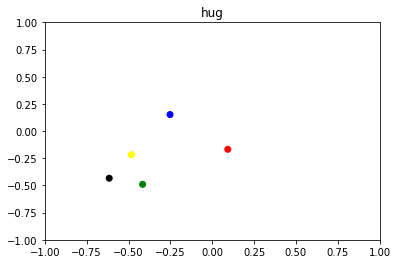

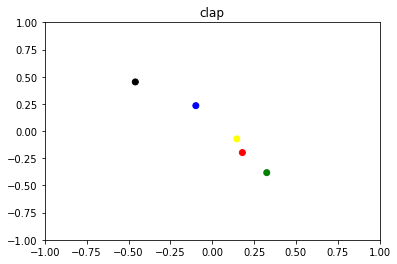

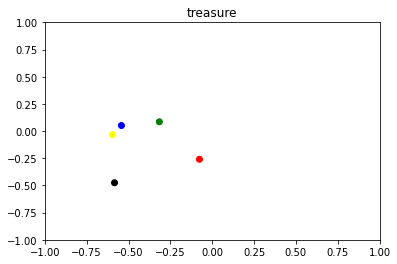

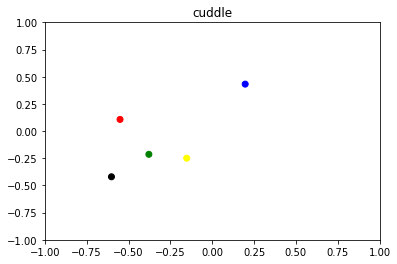

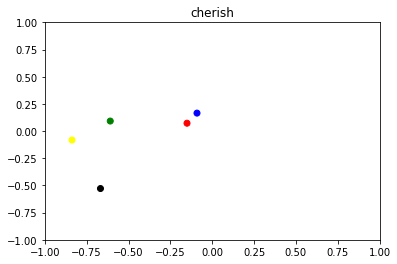

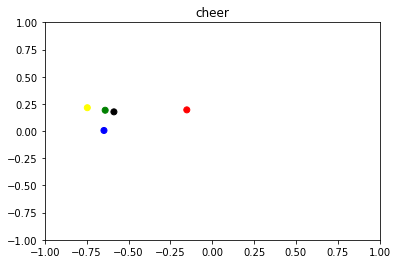

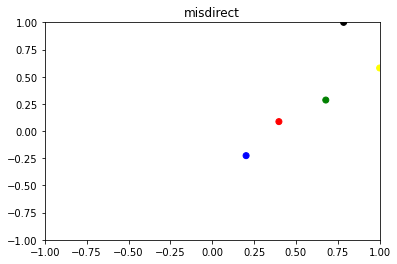

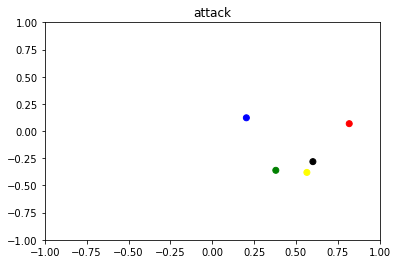

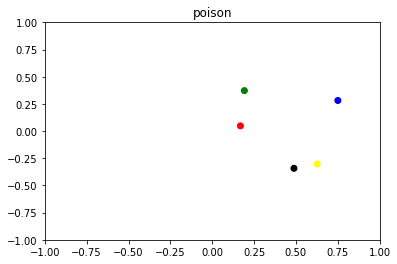

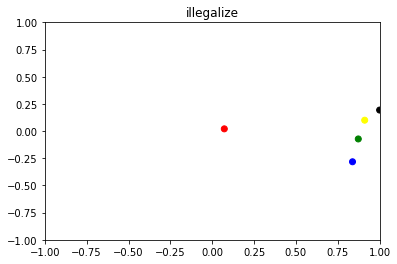

In [286]:
colors = ['red','blue','green','yellow','black']
for i, k in enumerate(pd_1_only.columns):
    if i in [i for i,v in enumerate(varnp[:,0]) if v > .04]:
        plt.figure()
        plt.title(k)
        plt.scatter(pd_1_only[k],pd_2_only[k],c=colors)
        plt.ylim(-1,1)
        plt.xlim(-1,1)

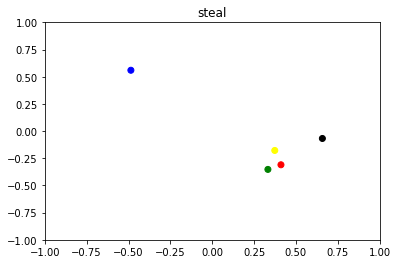

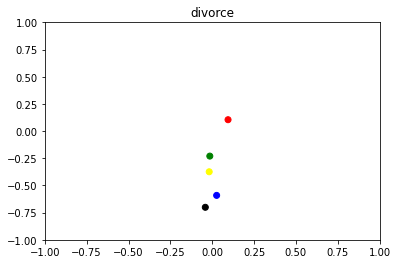

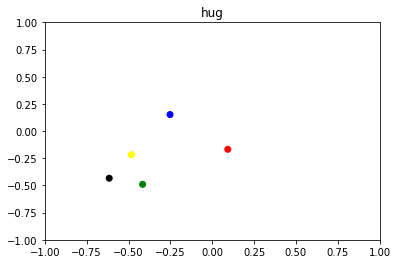

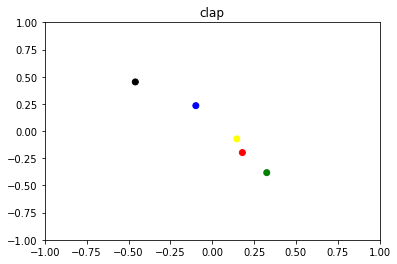

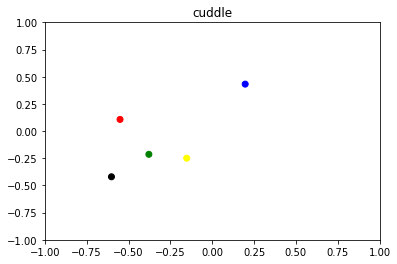

In [287]:
colors = ['red','blue','green','yellow','black']
for i, k in enumerate(pd_1_only.columns):
    if pd_1_only[k].max() > 0 and pd_1_only[k].min() < 0:
        plt.figure()
        plt.title(k)
        plt.scatter(pd_1_only[k],pd_2_only[k],c=colors)
        plt.ylim(-1,1)
        plt.xlim(-1,1)

In [288]:
#pd_2_only*=4

In [289]:
pd_2_only = pd_2_only.abs()

In [290]:
pd_2_only[['enjoy','thank']]

,enjoy,thank
0,0.313756,1.000000
1,0.732629,0.743233
2,0.454837,0.533697
3,0.267402,0.533718
4,0.274708,0.248060


In [295]:
for i, k in enumerate([ 'divorce','drink']):
    pd_2_only[k] += 2

In [298]:
for i, k in enumerate(['kill','pollute']):
    pd_2_only[k] += i

In [291]:

for i, k in enumerate([ 'enjoy','thank']):
    pd_2_only[k] += i

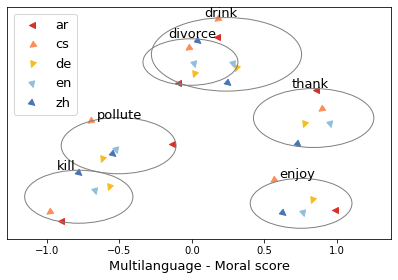

In [303]:
import matplotlib as mpl

colors = ['firebrick','darkblue','green','black','saddlebrown']
colors = ["#d73027", "#fc8d59", "#f5bd25", "#91bfdb", "#4575b4"]
fig, ax = plt.subplots()#figsize=(12,8))

kwarr = ['kill','pollute', 'blame', 'care',  'enjoy','thank']
kwarr = ['kill','pollute', 'enjoy','thank', 'divorce','drink']
for i, k in enumerate(kwarr):

    #plt.title(k)
    max_c = max([(pd_1_only[k]-pd_1_only[k].mean()).abs().max(),(pd_2_only[k]-pd_2_only[k].mean()).abs().max()])
    c = plt.Circle((-1*pd_1_only[k].mean(),pd_2_only[k].mean()),max_c+.027,color='gray',fill=False)
    ax.add_patch(c)
    #plt.plot([pd_1_only[k].mean()],[pd_2_only[k].mean()],c='gray',marker='x')

for i, k in enumerate(kwarr):

    handles = []
    for j in range(5):    
        t = mpl.markers.MarkerStyle(marker='<')
        t._transform = t.get_transform().rotate_deg(j*35)

        h = plt.scatter([-1*pd_1_only[k][j]], [pd_2_only[k][j]], c=colors[j], 
                marker= t)
        handles.append(h)

    
    ax.text(-1*pd_1_only[k].mean()-.15, pd_2_only[k].mean()+(pd_2_only[k]-pd_2_only[k].mean()).abs().max()+.035, k, fontsize=13)

fontproperties = {'size': 13}

ax.set_xlabel('Multilanguage - Moral score', fontproperties)
#ax.spines['left'].set_color('none')

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    #top=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
"""
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
"""
#plt.ylim(-.85,.85)
plt.xlim(-1,1)
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)
plt.tight_layout()
plt.axis('tight')
#plt.title('close')
plt.legend(handles,['ar','cs','de','en','zh'],prop={'size':13}) #,prop=fontproperties)
plt.savefig('multi_moral_scores.pdf',bbox_inches='tight')

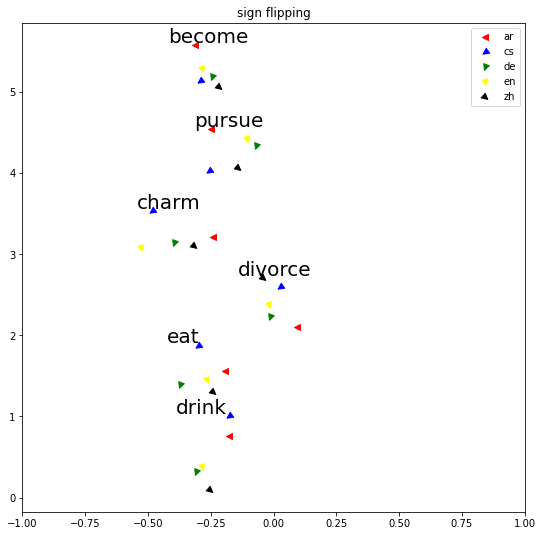

In [293]:
import matplotlib as mpl

keys = ['drink','eat','divorce','charm','pursue','become']
colors = ['red','blue','green','yellow','black']
fig, ax = plt.subplots(figsize=(9,9))
for i, k in enumerate(keys):

    #plt.title(k)
    max_c = max([(pd_1_only[k]-pd_1_only[k].mean()).abs().max(),1*i+(pd_2_only[k]-pd_2_only[k].mean()).abs().max()])
    c = plt.Circle((pd_1_only[k].mean(),.5*i+pd_2_only[k].mean()),max_c+.027,color='gray',fill=False)
    #ax.add_patch(c)

for i, k in enumerate(keys):

    handles = []
    for j in range(5):    
        t = mpl.markers.MarkerStyle(marker='<')
        t._transform = t.get_transform().rotate_deg(j*35)

        h = plt.scatter([pd_1_only[k][j]], [1*i+pd_2_only[k][j]], c=colors[j], 
                marker= t)
        handles.append(h)
    #plt.ylim(-1,1)
    plt.xlim(-1,1)
    
    ax.text(pd_1_only[k].mean()-.15, 1*i+pd_2_only[k].mean()+(pd_2_only[k]-pd_2_only[k].mean()).abs().max()+.035, k, fontsize=20)

plt.title('sign flipping')
plt.legend(handles,['ar','cs','de','en','zh'])
plt.savefig('multi_sign_flipping.pdf')

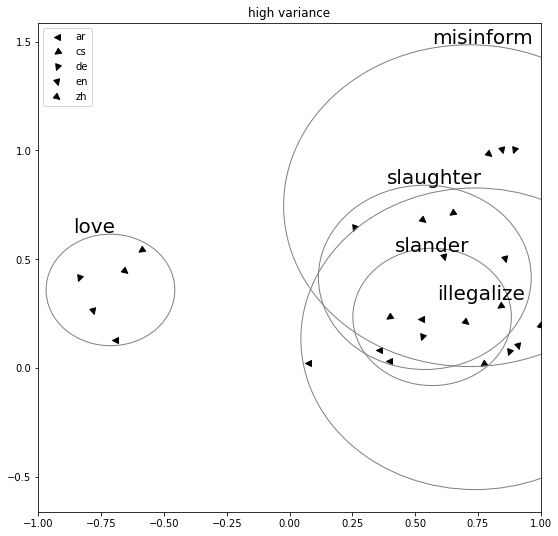

In [294]:
import matplotlib as mpl
keys = ['slaughter','illegalize', 'love', 'slander',  'misinform']
colors = ['red','blue','green','yellow','black']
fig, ax = plt.subplots(figsize=(9,9))

for i, k in enumerate(keys):

    #plt.title(k)
    max_c = max([(pd_1_only[k]-pd_1_only[k].mean()).abs().max(),(pd_2_only[k]-pd_2_only[k].mean()).abs().max()])
    c = plt.Circle((pd_1_only[k].mean(),pd_2_only[k].mean()),max_c+.027,color='gray',fill=False)
    ax.add_patch(c)

for i, k in enumerate(keys):

    handles = []
    for j in range(5):    
        t = mpl.markers.MarkerStyle(marker='<')
        t._transform = t.get_transform().rotate_deg(j*35)

        h = plt.scatter([pd_1_only[k][j]], [pd_2_only[k][j]], c='black', 
                marker= t)
        handles.append(h)
    #plt.ylim(-1,1)
    plt.xlim(-1,1)
    
    ax.text(pd_1_only[k].mean()-.15, pd_2_only[k].mean()+(pd_2_only[k]-pd_2_only[k].mean()).abs().max()+.035, k, fontsize=20)

plt.title('high variance')
plt.legend(handles,['ar','cs','de','en','zh'])
plt.savefig('multi_high_variance.pdf')